**Problem Statement:**

The problem is to predict which high-value telecom customers are likely to stop using the service (churn) in the near future, based on their usage patterns over the first three months. By identifying these customers early, the company can take actions to retain them, such as offering discounts or improving service quality.

**Steps to be followed:**
1. Data exploration and preparation
2. Feature engineering and selection
3. Model building
4. Model evaluation

In [1]:
# Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the data and understanding it's structure
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
# Checking the shape of the dataset
df.shape

(99999, 226)

In [5]:
# Checking the columns present in the dataset
cols = df.columns
cols

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [6]:
# Check for the missing values in the dataset
col_percent = df.isnull().sum()/df.shape[0]*100
col_percent

,0
mobile_number,0.00000
circle_id,0.00000
loc_og_t2o_mou,1.01801
std_og_t2o_mou,1.01801
loc_ic_t2o_mou,1.01801
...,...
aon,0.00000
aug_vbc_3g,0.00000
jul_vbc_3g,0.00000
jun_vbc_3g,0.00000


In [7]:
# Removing the columns with greater than 50% of the data missing
drop_cols = col_percent[col_percent > 50].index
drop_cols

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [8]:
# Dropping the columns with missing values
df.drop(drop_cols, axis=1, inplace=True)

In [9]:
cols = df.columns

In [10]:
cols

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=186)

In [11]:
# Removing the columns which have only one unique value
drop_cols = []
val = 0
for i in cols:
  val = df[i].nunique()
  if val == 1:
    drop_cols.append(i)


In [12]:
# Dropping the columns with only one unique value
df.drop(drop_cols, axis=1, inplace=True)

Filtering the high value customers

In [13]:
# Retain customers having greater than 70 percentile of avg recharge in first 2 months
df['high_avg'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

In [14]:
# Removing all customers with less than the 70 percentile
avg = df['high_avg'].quantile(0.7)
df = df[df['high_avg'] >= avg]

In [15]:
# Dropping the column which was only used to filter
df.drop('high_avg', axis=1, inplace=True)

In [16]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,...,0,0,0,0,0,802,57.74,19.38,18.74,0.0
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,0,0,0,0,0,315,21.03,910.65,122.16,0.0
13,7002191713,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,...,0,0,0,0,0,2607,0.00,0.00,0.00,0.0
16,7000875565,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,...,0,0,0,0,0,511,0.00,2.45,21.89,0.0
17,7000187447,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,...,0,0,0,0,0,667,0.00,0.00,0.00,0.0


In [17]:
cols = df.columns

In [18]:
# Check for the missing values in the dataset
col_percent = df.isnull().sum()/df.shape[0]*100
col_percent.sort_values(ascending=False)

,0
og_others_9,5.677918
roam_ic_mou_9,5.677918
loc_og_t2c_mou_9,5.677918
loc_og_mou_9,5.677918
loc_ic_mou_9,5.677918
...,...
max_rech_amt_8,0.000000
max_rech_amt_9,0.000000
last_day_rch_amt_6,0.000000
last_day_rch_amt_7,0.000000


It looks like minutes of usage is missing across some rows in September consistently.

In [19]:
# Drop the rows which have missing values of minutes of usage
df = df.dropna(subset=['og_others_9'])

In [20]:
col_percent = df.isnull().sum()/df.shape[0]*100
col_percent.sort_values(ascending=False)

,0
date_of_last_rech_8,1.077472
date_of_last_rech_9,1.042145
std_ic_t2f_mou_8,0.554633
std_ic_t2t_mou_8,0.554633
std_ic_mou_8,0.554633
...,...
arpu_6,0.000000
loc_ic_t2f_mou_9,0.000000
loc_ic_t2m_mou_9,0.000000
loc_ic_t2t_mou_9,0.000000


In [21]:
# Drop the rows which have missing values of minutes of usage
df = df.dropna(subset=['std_ic_t2f_mou_8'])

In [22]:
col_percent = df.isnull().sum()/df.shape[0]*100
col_percent.sort_values(ascending=False)

,0
date_of_last_rech_9,1.015986
date_of_last_rech_8,1.012433
loc_ic_mou_6,0.440497
loc_og_t2m_mou_6,0.440497
loc_ic_t2t_mou_6,0.440497
...,...
og_others_9,0.000000
og_others_8,0.000000
spl_og_mou_9,0.000000
spl_og_mou_8,0.000000


In [23]:
# Drop the rows which have missing values of minutes of usage
df = df.dropna(subset=['loc_ic_mou_6'])

In [24]:
col_percent = df.isnull().sum()/df.shape[0]*100
col_percent.sort_values(ascending=False)

,0
date_of_last_rech_9,1.020481
date_of_last_rech_8,1.013345
date_of_last_rech_7,0.203383
loc_ic_t2t_mou_7,0.124884
loc_og_t2c_mou_7,0.124884
...,...
spl_og_mou_9,0.000000
og_others_6,0.000000
og_others_8,0.000000
og_others_9,0.000000


In [25]:
# Drop the rows which have missing values of minutes of usage
df = df.dropna(subset=['loc_ic_t2t_mou_7'])

In [26]:
col_percent = df.isnull().sum()/df.shape[0]*100
col_percent.sort_values(ascending=False)

,0
date_of_last_rech_9,1.021757
date_of_last_rech_8,1.011039
date_of_last_rech_7,0.203637
date_of_last_rech_6,0.096460
mobile_number,0.000000
...,...
isd_og_mou_7,0.000000
isd_og_mou_8,0.000000
isd_og_mou_9,0.000000
spl_og_mou_6,0.000000


In [27]:
# Deleting the date columns as they are not required
df.drop(['date_of_last_rech_6','date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'], axis=1, inplace=True)

In [28]:
df.shape

(27991, 166)

In [29]:
# Creating the churn column based on the September related data
df['churn'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

In [30]:
# Deleting all the columns that has '_9' in the dataset
drop_cols = [k for k in df.columns if '_9' in k]
df.drop(drop_cols, axis=1, inplace=True)

In [31]:
# Deleting the columns that have 'sep' in the dataset
drop_cols = [k for k in df.columns if 'sep' in k]
df.drop(drop_cols, axis=1, inplace=True)

In [32]:
df.shape

(27991, 126)

In [33]:
num_cols = df.columns.drop(['mobile_number','churn'])

In [34]:
# Removing the values that have less than 5 or greater than 95 percentile
for i in num_cols:
  q1 = df[i].quantile(0.1)
  q2 = df[i].quantile(0.9)
  iqr = q2 - q1
  low = q1- (1.5*iqr)
  high = q2 + (1.5*iqr)
  inp = df.loc[(df[i] >= low) & (df[i] <= high)]

Deriving new features

In [35]:
# Checking if the mou has decreased in the action phase
inp['mou_good'] = inp['total_ic_mou_6'] + inp ['total_og_mou_6']
inp['mou_action'] = (inp['total_ic_mou_7'] + inp ['total_og_mou_7'] + inp['total_ic_mou_8'] + inp ['total_og_mou_8'])/2
inp['mou_diff'] = inp['mou_action'] - inp['mou_good']
inp['mou_decreased'] = np.where(inp['mou_diff'] < 0, 1, 0)
inp.drop(['mou_good', 'mou_action', 'mou_diff'], axis=1, inplace=True)

In [36]:
# Checking if the recharge amount has decreased in the action phase
inp['amt_good'] = inp['total_rech_amt_6']
inp['amt_action'] = (inp['total_rech_amt_7'] + inp['total_rech_amt_8'])/2
inp['amt_diff'] = inp['amt_action'] - inp['amt_good']
inp['amt_decreased'] = np.where(inp['amt_diff'] < 0, 1, 0)
inp.drop(['amt_good', 'amt_action', 'amt_diff'], axis=1, inplace=True)

In [37]:
# Checking if the number of recharges has decreased in the action phase
inp['recharges_good'] = inp['total_rech_num_6']
inp['recharges_action'] = (inp['total_rech_num_7'] + inp['total_rech_num_8'])/2
inp['recharges_diff'] = inp['recharges_action'] - inp['recharges_good']
inp['rech_decreased'] = np.where(inp['recharges_diff'] < 0, 1, 0)
inp.drop(['recharges_good', 'recharges_action', 'recharges_diff'], axis=1, inplace=True)

In [38]:
# Checking if the average revenue per customer has decreased in the action phase
inp['rev_good'] = inp['arpu_6']
inp['rev_action'] = (inp['arpu_7'] + inp['arpu_8'])/2
inp['rev_diff'] = inp['rev_action'] - inp['rev_good']
inp['arpu_decreased'] = np.where(inp['rev_diff'] < 0, 1, 0)
inp.drop(['rev_good', 'rev_action', 'rev_diff'], axis=1, inplace=True)

In [39]:
# Checking if the data usage has decreased in the action phase
inp['data_good'] = inp['vol_2g_mb_6'] + inp['vol_3g_mb_6']
inp['data_action'] = (inp['vol_2g_mb_7'] + inp['vol_3g_mb_7'] + inp['vol_2g_mb_8'] + inp['vol_3g_mb_8'])/2
inp['data_diff'] = inp['data_action'] - inp['data_good']
inp['data_decreased'] = np.where(inp['data_diff'] < 0, 1, 0)
inp.drop(['data_good', 'data_action', 'data_diff'], axis=1, inplace=True)

EDA

Univariate Analysis

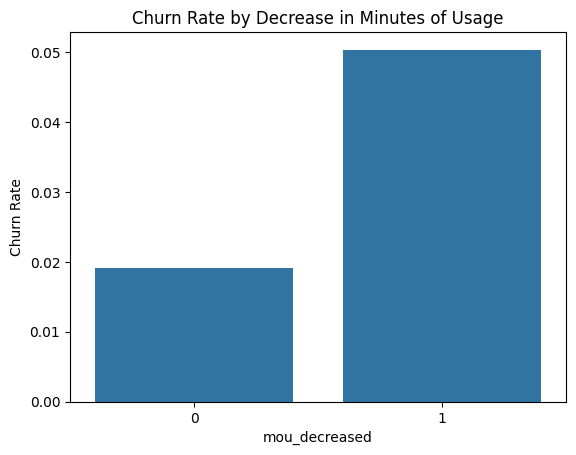

In [40]:
# Churn rate on the basis whether the customer decreased their MOU in action month
agg_data = inp.groupby('mou_decreased')['churn'].mean().reset_index()
sns.barplot(x='mou_decreased', y='churn', data=agg_data)

plt.ylabel('Churn Rate')
plt.title('Churn Rate by Decrease in Minutes of Usage')
plt.show()

From the above plot, it is clear that churn rate is higher when the minutes of usage is decreased.

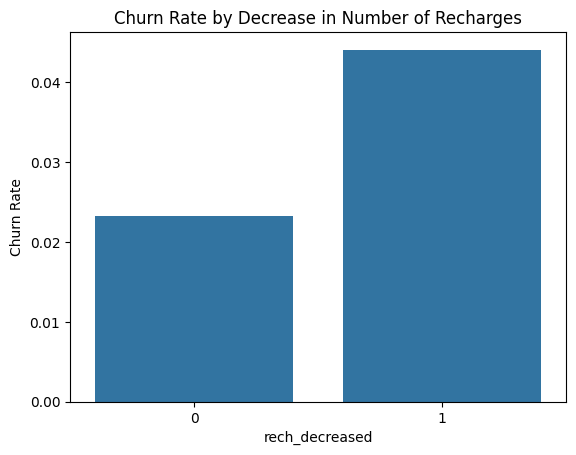

In [41]:
# Churn rate on the basis whether the customer decreased their number of recharge in action month
agg_data = inp.groupby('rech_decreased')['churn'].mean().reset_index()
sns.barplot(x='rech_decreased', y='churn', data=agg_data)

plt.ylabel('Churn Rate')
plt.title('Churn Rate by Decrease in Number of Recharges')
plt.show()

Again from the above plot, it is clear the number of recharges made when decreased lead to higher churn rate.

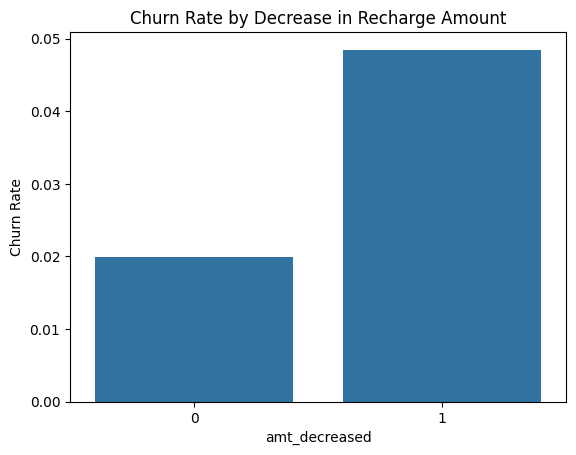

In [42]:
# Churn rate on the basis whether the customer decreased their Recharge amount
agg_data = inp.groupby('amt_decreased')['churn'].mean().reset_index()
sns.barplot(x='amt_decreased', y='churn', data=agg_data)

plt.ylabel('Churn Rate')
plt.title('Churn Rate by Decrease in Recharge Amount')
plt.show()

Again from the above plot, it is clear that whenever the recharge amount is decreased by customers they have high churn rate.

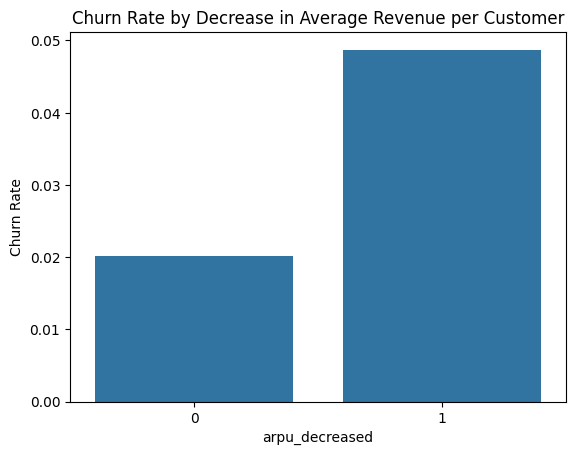

In [43]:
# Churn rate on the basis when the average revenue per customer is decreased
agg_data = inp.groupby('arpu_decreased')['churn'].mean().reset_index()
sns.barplot(x='arpu_decreased', y='churn', data=agg_data)

plt.ylabel('Churn Rate')
plt.title('Churn Rate by Decrease in Average Revenue per Customer')
plt.show()

Again from the above plot, it is clear that whenever the average revenue per customer is decreased they have high churn rate.

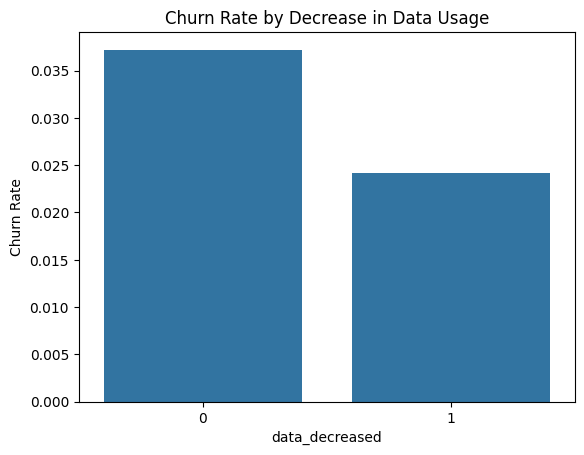

In [44]:
# Churn rate on the basis when the data usage by customer is decreased
agg_data = inp.groupby('data_decreased')['churn'].mean().reset_index()
sns.barplot(x='data_decreased', y='churn', data=agg_data)

plt.ylabel('Churn Rate')
plt.title('Churn Rate by Decrease in Data Usage')
plt.show()

The decrease in data usage doesn't reflect in churn rate, which is opposite to the beahvior seen in other dervived attributes.

Bivariate Analysis

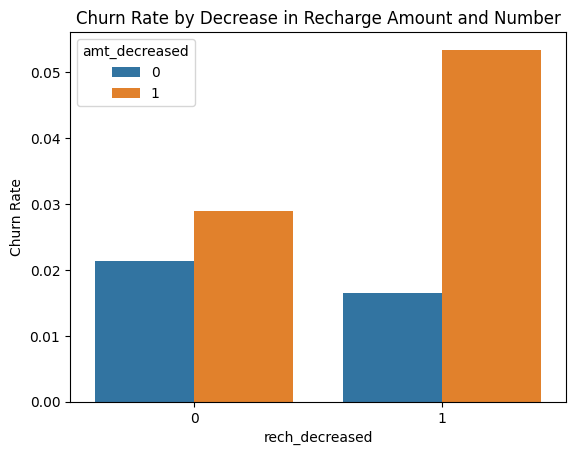

In [45]:
# Analysis of churn rate by the decreasing recharge amount and number of recharge
agg_data = inp.groupby(['rech_decreased', 'amt_decreased'])['churn'].mean().reset_index()
sns.barplot(x='rech_decreased', y='churn', hue='amt_decreased', data=agg_data)

plt.ylabel('Churn Rate')
plt.title('Churn Rate by Decrease in Recharge Amount and Number')
plt.show()

We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased

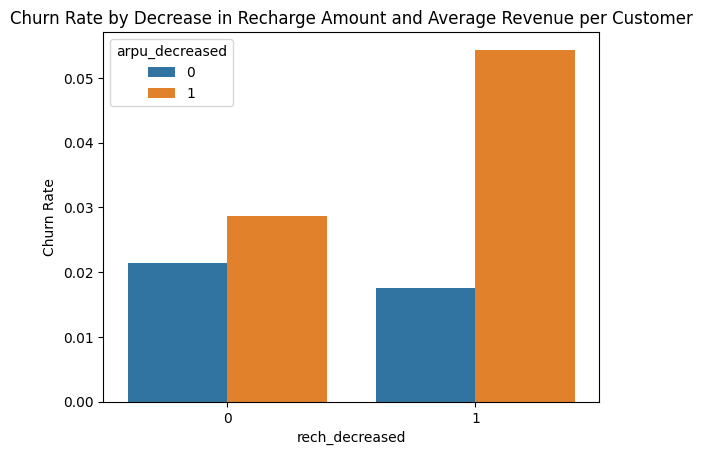

In [46]:
# Analysis of churn rate by the decreasing recharge amount and average revenue per customer
agg_data = inp.groupby(['rech_decreased', 'arpu_decreased'])['churn'].mean().reset_index()
sns.barplot(x='rech_decreased', y='churn', hue='arpu_decreased', data=agg_data)

plt.ylabel('Churn Rate')
plt.title('Churn Rate by Decrease in Recharge Amount and Average Revenue per Customer')
plt.show()

We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as average revenue per customer is decreased

Train-test split

In [47]:
# Splitting data into train and test set 80:20
from sklearn.model_selection import train_test_split
X = inp.drop(['mobile_number','churn'], axis=1)
y = inp['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dealing with data imbalance

In [48]:
# Creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

Feature Scaling

In [49]:
# Fit the data into scaler and transform
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = inp.columns.to_list()
cols.remove('churn')
cols.remove('mobile_number')
X_train[cols] = scaler.fit_transform(X_train[cols])

In [50]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,mou_decreased,amt_decreased,rech_decreased,arpu_decreased,data_decreased
0,-0.463104,0.025017,-0.510369,-0.728028,-0.655931,-0.483647,-0.687409,-0.627831,-0.540447,-0.266815,...,-0.116425,2.250181,-0.256553,-0.262808,-0.301947,0.871733,0.838521,0.860971,0.851055,2.858603
1,-0.294462,-1.184960,-0.319134,2.545543,2.636675,3.420537,-0.844439,-0.724938,-0.573116,-0.266815,...,-0.116425,1.765516,-0.256553,-0.262808,-0.301947,-1.147140,-1.192576,0.860971,0.851055,-0.349821
2,-0.867059,-0.414981,-0.583744,-0.374310,-0.119183,-0.406627,-0.467040,-0.081552,-0.280182,-0.266815,...,-0.116425,-0.284089,-0.256553,-0.262808,-0.301947,0.871733,-1.192576,-1.161480,-1.175012,-0.349821
3,0.186036,-0.301203,0.139266,0.834596,0.207885,1.507714,0.096855,-0.559452,-0.541925,-0.266815,...,-0.116425,0.425973,-0.256553,-0.262808,-0.301947,0.871733,0.838521,-1.161480,0.851055,-0.349821
4,1.380777,1.329201,2.206955,0.133798,-0.243860,0.209461,1.623916,3.085383,5.321772,1.413623,...,-0.116425,2.444046,-0.256553,-0.262808,-0.301947,-1.147140,-1.192576,-1.161480,-1.175012,-0.349821


In [51]:
# Transform the test set
X_test[cols] = scaler.transform(X_test[cols])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,mou_decreased,amt_decreased,rech_decreased,arpu_decreased,data_decreased
30295,0.445008,-0.002687,0.286081,-0.705539,-0.656720,-0.503902,0.617436,0.150949,0.690348,-0.266815,...,-0.116425,0.183057,-0.256553,-0.262808,-0.301947,0.871733,0.838521,0.860971,0.851055,-0.349821
19559,0.022705,0.134896,-0.083266,-0.144462,-0.253899,0.026154,-0.299648,-0.290545,0.224165,0.216702,...,-0.116425,-0.634449,-0.256553,-0.262808,-0.301947,0.871733,0.838521,0.860971,0.851055,-0.349821
12294,-0.403781,0.189585,-0.059684,0.140130,1.019450,-0.082179,-0.797245,-0.773338,-0.502122,1.256160,...,-0.116425,-0.620435,-0.256553,-0.262808,-0.301947,-1.147140,-1.192576,-1.161480,-1.175012,-0.349821
78310,0.436986,-0.846980,-0.251206,-0.712825,-0.693836,-0.544090,0.396785,-0.661991,-0.373963,-0.266815,...,-0.116425,-0.740725,0.796967,0.868940,0.995756,0.871733,0.838521,0.860971,0.851055,-0.349821
85440,0.737797,-0.759276,-0.408758,-0.542337,-0.533543,-0.350483,-0.541118,-0.500247,-0.151076,-0.266815,...,-0.116425,1.988579,-0.241817,-0.130484,-0.092853,-1.147140,0.838521,0.860971,0.851055,2.858603


Model Building

Logistic Regression

In [52]:
# Lets begin with Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [53]:
# Evaluating the model
y_train_pred = lr.predict(X_train)

In [54]:
accuracy_score(y_train, y_train_pred)

0.8863919501677049

In [55]:
confusion_matrix(y_train, y_train_pred)

array([[17804,  3066],
       [ 1676, 19194]])

In [56]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88     20870
           1       0.86      0.92      0.89     20870

    accuracy                           0.89     41740
   macro avg       0.89      0.89      0.89     41740
weighted avg       0.89      0.89      0.89     41740



In [57]:
# Performance on test set
y_test_pred = lr.predict(X_test)

In [58]:
accuracy_score(y_test, y_test_pred)

0.8415310650887574

In [59]:
confusion_matrix(y_test, y_test_pred)

array([[4414,  812],
       [  45,  137]])

In [60]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      5226
           1       0.14      0.75      0.24       182

    accuracy                           0.84      5408
   macro avg       0.57      0.80      0.58      5408
weighted avg       0.96      0.84      0.89      5408



We had created a baseline model which is performing decent, with good accuracy rate, but precision, recall and f1 scores are less

Decision Trees

In [61]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [62]:
# Performance on the train set
y_train_pred = dt.predict(X_train)

In [63]:
accuracy_score(y_train, y_train_pred)

1.0

In [64]:
# Performance on test set
y_test_pred = dt.predict(X_test)

In [65]:
accuracy_score(y_test, y_test_pred)

0.9413831360946746

In [66]:
confusion_matrix(y_test, y_test_pred)

array([[4995,  231],
       [  86,   96]])

In [67]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5226
           1       0.29      0.53      0.38       182

    accuracy                           0.94      5408
   macro avg       0.64      0.74      0.67      5408
weighted avg       0.96      0.94      0.95      5408



Although the decision tree model is providing higher accuracy, it's precison and recall values for churn prediction are very low

Random Forest

In [68]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=50, oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)

In [69]:
# Performance on the train set
y_train_pred = rf.predict(X_train)

In [70]:
accuracy_score(y_train, y_train_pred)

1.0

In [71]:
# Performance on test set
y_test_pred = rf.predict(X_test)

In [72]:
accuracy_score(y_test, y_test_pred)

0.9556213017751479

In [73]:
confusion_matrix(y_test, y_test_pred)

array([[5056,  170],
       [  70,  112]])

In [74]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5226
           1       0.40      0.62      0.48       182

    accuracy                           0.96      5408
   macro avg       0.69      0.79      0.73      5408
weighted avg       0.97      0.96      0.96      5408



The random forest model also has higher accuracy compared to regression model, but again the precision and recall values are very low for the test set. Also, from here on we can continue with logistic regression and random forest models as the decision tree is the underlying structure of random forest.

Model evaluation: Cross validation

In [75]:
# Cross validation for logistic regression
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=5, n_jobs=-1)
print(scores)

[0.87470053 0.89027312 0.88596071 0.88392429 0.8905127 ]


In [76]:
# Cross validation for Random forest
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=5, n_jobs=-1)
print(scores)

[0.97664111 0.9822712  0.98382846 0.98203162 0.98263057]


Feature selection using cross validation

In [77]:
# Recursive feature elimination
from sklearn.feature_selection import RFE
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [78]:
rfe.ranking_

array([  5,  49,  61,  50,  34,  36,  69,  68,   1,  20,  32,   1,  19,
       112,   1,  51,  38,  37,   4,  23,  47,  88,  56,  57,  82,  83,
        91,  87,  74,  80,  33,  67,  35,  70,  98,   1,  86,  94,  95,
       104,   1,  89, 106,  16,   1,  79,  99,  90,  92,  31,   1, 105,
        97,   1, 113, 102,  13,  64, 101,  75,  60,  39,   1,  30, 111,
        41,  46,  40,  42, 109,  77,  85,  58,  59,  27, 108, 100,  84,
       107,  76,   1,  71,  72,   2,  45, 103,  81,  24,  73,   1,  54,
       114,   1,  17,  48,  65,  18,  52,  96, 115,  53,   1,  12,  93,
        15,   8,  22,  43,  11,   6,   1,  63,  55,  10,   9,  21,   1,
       110,  62,  14,  29,  25,  78,  26,  44,  28,   7,  66,   3])

In [79]:
X_train.columns[rfe.support_]

Index(['offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8',
       'std_og_mou_7', 'isd_og_mou_8', 'og_others_8', 'total_og_mou_8',
       'loc_ic_t2f_mou_8', 'total_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'monthly_3g_8'],
      dtype='object')

In [80]:
X_train2 = X_train.loc[:, rfe.support_]

Evaluation using cross val score

In [81]:
cross_val_score(estimator=lr, X=X_train2, y=y_train, cv=5, n_jobs=-1)

array([0.85206037, 0.86212266, 0.85481552, 0.85421658, 0.8617633 ])

Cross val score has dropped for 15 features compared to all features. This could also be due to multicolinearity.

Hyperparameter tuning using cross validation

In [82]:
# Considering the data set is large, going ahead with randomized search cv
from sklearn.model_selection import RandomizedSearchCV

In [83]:
hyper_params = {
    'max_depth': range(3, 20),
    'max_features': range(3, 20),
    'min_samples_leaf': range(20, 400, 50),
    'n_estimators': range(10, 101, 10)
}

In [84]:
rcv = RandomizedSearchCV(estimator=rf, param_distributions=hyper_params, cv=3, n_jobs=-1, n_iter=10)
rcv.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=50,
                                                    oob_score=True,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(3, 20),
                                        'max_features': range(3, 20),
                                        'min_samples_leaf': range(20, 400, 50),
                                        'n_estimators': range(10, 101, 10)})

In [85]:
rcv.best_score_

0.9451366106748301

Extracting the best model for Random forest

In [86]:
rf_best = rcv.best_estimator_
rf_best

RandomForestClassifier(max_depth=12, max_features=9, min_samples_leaf=170,
                       n_estimators=70, oob_score=True, random_state=42)

In [87]:
y_test_pred = rf_best.predict(X_test)

In [88]:
accuracy_score(y_test, y_test_pred)

0.922707100591716

In [89]:
confusion_matrix(y_test, y_test_pred)

array([[4829,  397],
       [  21,  161]])

In [90]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      5226
           1       0.29      0.88      0.44       182

    accuracy                           0.92      5408
   macro avg       0.64      0.90      0.70      5408
weighted avg       0.97      0.92      0.94      5408



Although we were able to achieve good recall value, precison for this model is still low

Logistic regression

Model 1

In [91]:
# Logistic regression model
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                41740
Model:                            GLM   Df Residuals:                    41610
Model Family:                Binomial   Df Model:                          129
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 07 Jan 2025   Deviance:                       23400.
Time:                        09:29:48   Pearson chi2:                 7.03e+07
No. Iterations:                    35   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -32.9776   5864

In [92]:
# using the rfe values that was created previously
col = X_train.columns[rfe.support_]

Model 2

In [93]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                41740
Model:                            GLM   Df Residuals:                    41724
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 07 Jan 2025   Deviance:                       29828.
Time:                        09:29:49   Pearson chi2:                 3.10e+10
No. Iterations:                    35   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -33.7500   5818

In [94]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,offnet_mou_8,7.45
3,std_og_t2m_mou_8,6.18
7,total_og_mou_8,3.45
4,std_og_mou_7,1.84
2,roam_og_mou_8,1.76
9,total_ic_mou_8,1.60
11,total_rech_num_8,1.39
12,last_day_rch_amt_8,1.36
1,roam_ic_mou_8,1.35
8,loc_ic_t2f_mou_8,1.19


Removing column og_others_8 as it has very high p-value of 0.99

In [95]:
col = col.drop('og_others_8')

Model 3

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                41740
Model:                            GLM   Df Residuals:                    41725
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14957.
Date:                Tue, 07 Jan 2025   Deviance:                       29915.
Time:                        09:29:51   Pearson chi2:                 3.62e+10
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4881
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8382      0

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,offnet_mou_8,7.45
3,std_og_t2m_mou_8,6.18
6,total_og_mou_8,3.45
4,std_og_mou_7,1.84
2,roam_og_mou_8,1.76
8,total_ic_mou_8,1.60
10,total_rech_num_8,1.39
11,last_day_rch_amt_8,1.36
1,roam_ic_mou_8,1.35
7,loc_ic_t2f_mou_8,1.19


All the variables p-values are significant and offnet_mou_8 column has the highest VIF 7.45. Hence, removing offnet_mou_8 column.

In [98]:
col = col.drop('offnet_mou_8')

Model 4

In [99]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                41740
Model:                            GLM   Df Residuals:                    41726
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15212.
Date:                Tue, 07 Jan 2025   Deviance:                       30423.
Time:                        09:29:54   Pearson chi2:                 3.06e+07
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4818
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7756      0

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_og_mou_8,2.87
2,std_og_t2m_mou_8,1.90
3,std_og_mou_7,1.67
1,roam_og_mou_8,1.54
7,total_ic_mou_8,1.48
9,total_rech_num_8,1.39
10,last_day_rch_amt_8,1.36
0,roam_ic_mou_8,1.35
6,loc_ic_t2f_mou_8,1.18
12,monthly_3g_8,1.05


Removing std_og_t2m_mou_8 since the p-value is greater

In [101]:
col = col.drop('std_og_t2m_mou_8')

Model 5

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                41740
Model:                            GLM   Df Residuals:                    41727
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15213.
Date:                Tue, 07 Jan 2025   Deviance:                       30426.
Time:                        09:29:55   Pearson chi2:                 3.00e+07
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4818
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7764      0

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_og_mou_8,2.17
2,std_og_mou_7,1.63
1,roam_og_mou_8,1.54
6,total_ic_mou_8,1.46
8,total_rech_num_8,1.39
9,last_day_rch_amt_8,1.36
0,roam_ic_mou_8,1.35
5,loc_ic_t2f_mou_8,1.18
11,monthly_3g_8,1.05
10,monthly_2g_8,1.04


Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.

In [104]:
# Model performance on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred.head()

,0
0,0.098903
1,0.069712
2,0.664850
3,0.224195
4,0.000555


In [105]:
# Creating a dataframe with the actual churn and the predicted probabilities
y_train_df = pd.DataFrame({'actual':y_train.values, 'predicted_prob':y_train_pred})
y_train_df.head()

,actual,predicted_prob
0,0,0.098903
1,0,0.069712
2,0,0.664850
3,0,0.224195
4,0,0.000555


In [106]:
# Finding Optimal Probablity Cutoff Point
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_df[i] = y_train_df['predicted_prob'].map(lambda x : 1 if x > i else 0)

y_train_df.head()


,actual,predicted_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.098903,1,0,0,0,0,0,0,0,0,0
1,0,0.069712,1,0,0,0,0,0,0,0,0,0
2,0,0.664850,1,1,1,1,1,1,1,0,0,0
3,0,0.224195,1,1,1,0,0,0,0,0,0,0
4,0,0.000555,1,0,0,0,0,0,0,0,0,0


In [107]:
# Calculate the accuracy sensitivity and specificity for various probability cutoffs
from sklearn import metrics
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_df['actual'], y_train_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.738093     0.982175     0.494011
0.2          0.2  0.784811     0.964638     0.604983
0.3          0.3  0.817873     0.945328     0.690417
0.4          0.4  0.841447     0.918112     0.764782
0.5          0.5  0.856732     0.883757     0.829708
0.6          0.6  0.861140     0.841878     0.880402
0.7          0.7  0.850623     0.780594     0.920652
0.8          0.8  0.779899     0.606852     0.952947
0.9          0.9  0.639962     0.303737     0.976186


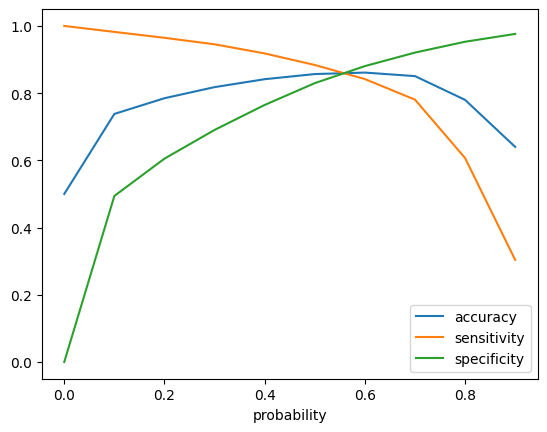

In [108]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

At point 0.5 where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

In [109]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff
y_train_df['predicted'] = y_train_df['predicted_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_df.head()

,actual,predicted_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.098903,1,0,0,0,0,0,0,0,0,0,0
1,0,0.069712,1,0,0,0,0,0,0,0,0,0,0
2,0,0.664850,1,1,1,1,1,1,1,0,0,0,1
3,0,0.224195,1,1,1,0,0,0,0,0,0,0,0
4,0,0.000555,1,0,0,0,0,0,0,0,0,0,0


In [110]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_df['actual'], y_train_df['predicted'] )
print(confusion)

[[17316  3554]
 [ 2426 18444]]


In [111]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [112]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_train_df['actual'], y_train_df['predicted']))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.8567321514135122
Sensitivity: 0.8837565884044083
Specificity: 0.8297077144226161


We have got good accuracy, sensitivity and specificity on the train set prediction.

In [113]:
# plotting the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

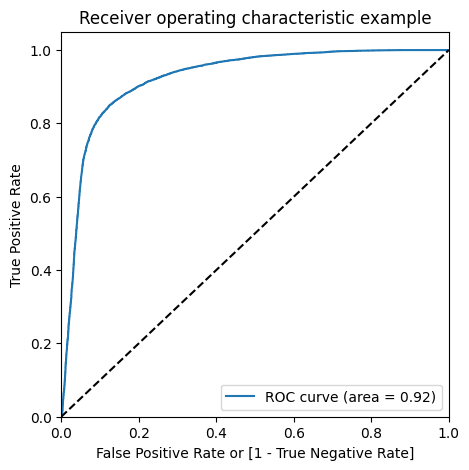

In [114]:
draw_roc(y_train_df['actual'], y_train_df['predicted_prob'])

We can see the area of the ROC curve is closer to 1, and equal to 0.92

Testing the model on the test set

In [115]:
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

In [116]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_pred, y_test], axis=1)
y_test_pred_final.head()

,0,churn
30295,0.275289,0
19559,0.416514,0
12294,0.311663,0
78310,0.246080,0
85440,0.087655,0


In [117]:

# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [118]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final[['churn_prob', 'churn']]
y_test_pred_final.head()

,churn_prob,churn
30295,0.275289,0
19559,0.416514,0
12294,0.311663,0
78310,0.246080,0
85440,0.087655,0


In [119]:
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [120]:
y_test_pred_final.head()

,churn_prob,churn,test_predicted
30295,0.275289,0,0
19559,0.416514,0,0
12294,0.311663,0,0
78310,0.246080,0,0
85440,0.087655,0,0


In [121]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[4276  950]
 [  27  155]]


In [122]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [123]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.8193417159763313
Sensitivity: 0.8516483516483516
Specificity: 0.8182166092613854


Overall, the model is performing well in the test set, what it had learnt from the train set.

The final model summary:

Train set
Accuracy = 0.85
Sensitivity = 0.88
Specificity = 0.82

Test set
Accuracy = 0.81
Sensitivity = 0.85
Specificity = 0.81

Overall, the model is performing well in the test set, what it had learnt from the train set.

Below are few top variables selected in the logistic regression model.

'total_og_mou_8', 'std_og_mou_7', 'roam_og_mou_8','total_ic_mou_8', 'total_ rech_num_8', 'last_day_rch_amt_8', 'roam_ic_mou_8', 'loc_ic_t2f_mou_8', 'monthly_3g_8', 'monthly_2g_8', 'ic_others_8', 'isd_og_mou_8'

